#### Imports

In [1]:
# Install the statsmodels package
from statsmodels.tsa.ar_model import AutoReg # AR model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from arima_models_family import ARIMAFamily
import prophet
import constant
import warnings

warnings.filterwarnings("ignore")

#### Read data (Assume data is clean and processed)


In [2]:
data = pd.read_parquet(constant.file_path)

In [3]:
data

,open
Date,
2024-04-29,634.40
2024-04-30,624.20
2024-05-01,627.60
2024-05-02,624.20
2024-05-03,633.70
...,...
2025-04-24,404.00
2025-04-25,400.90
2025-04-26,402.45


In [4]:
# object initialization
obj_1 = ARIMAFamily(data)

# Split the data into train and test sets
train_df,test_df = obj_1.train_test_split(data,'count',20)

In [5]:
test_df

,open
Date,
2025-04-09,349.000000
2025-04-10,351.000000
2025-04-11,355.000000
2025-04-12,353.000000
2025-04-13,353.000000
2025-04-14,353.666667
2025-04-15,367.000000
2025-04-16,370.000000
2025-04-17,380.000000


In [6]:

sub_train_df,val_df = obj_1.train_test_split(train_df,'count',40)

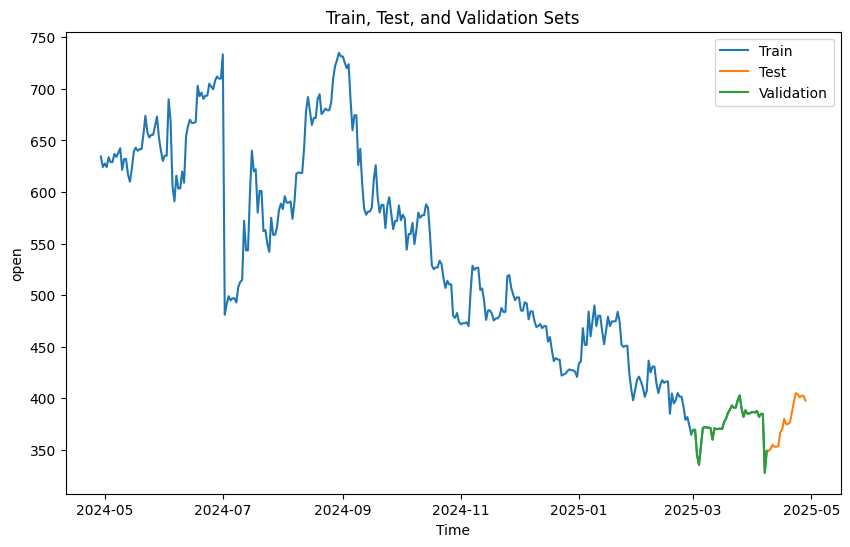

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(train_df['open'], label='Train')
plt.plot(test_df['open'], label='Test')
plt.plot(val_df['open'], label='Validation')
plt.title('Train, Test, and Validation Sets')
plt.xlabel('Time')
plt.ylabel('open')
plt.legend()
plt.show()

### Model Fitting

## 1) Auto Reg

In [8]:

obj_1.fit_model(AutoReg,train_df,lags=30) # AR model

In [9]:
obj_1.predict(train_df, test_df)

(            predictions      actual         mse       rmse      mape  \
 2025-04-09   355.994392  349.000000  562.686591  23.721016  4.917305   
 2025-04-10   347.683510  351.000000  562.686591  23.721016  4.917305   
 2025-04-11   349.598837  355.000000  562.686591  23.721016  4.917305   
 2025-04-12   348.867651  353.000000  562.686591  23.721016  4.917305   
 2025-04-13   346.089495  353.000000  562.686591  23.721016  4.917305   
 2025-04-14   350.587959  353.666667  562.686591  23.721016  4.917305   
 2025-04-15   353.927940  367.000000  562.686591  23.721016  4.917305   
 2025-04-16   355.682266  370.000000  562.686591  23.721016  4.917305   
 2025-04-17   363.887600  380.000000  562.686591  23.721016  4.917305   
 2025-04-18   358.571002  375.000000  562.686591  23.721016  4.917305   
 2025-04-19   362.002555  375.000000  562.686591  23.721016  4.917305   
 2025-04-20   368.576222  376.666667  562.686591  23.721016  4.917305   
 2025-04-21   373.489018  386.100000  562.686591  2

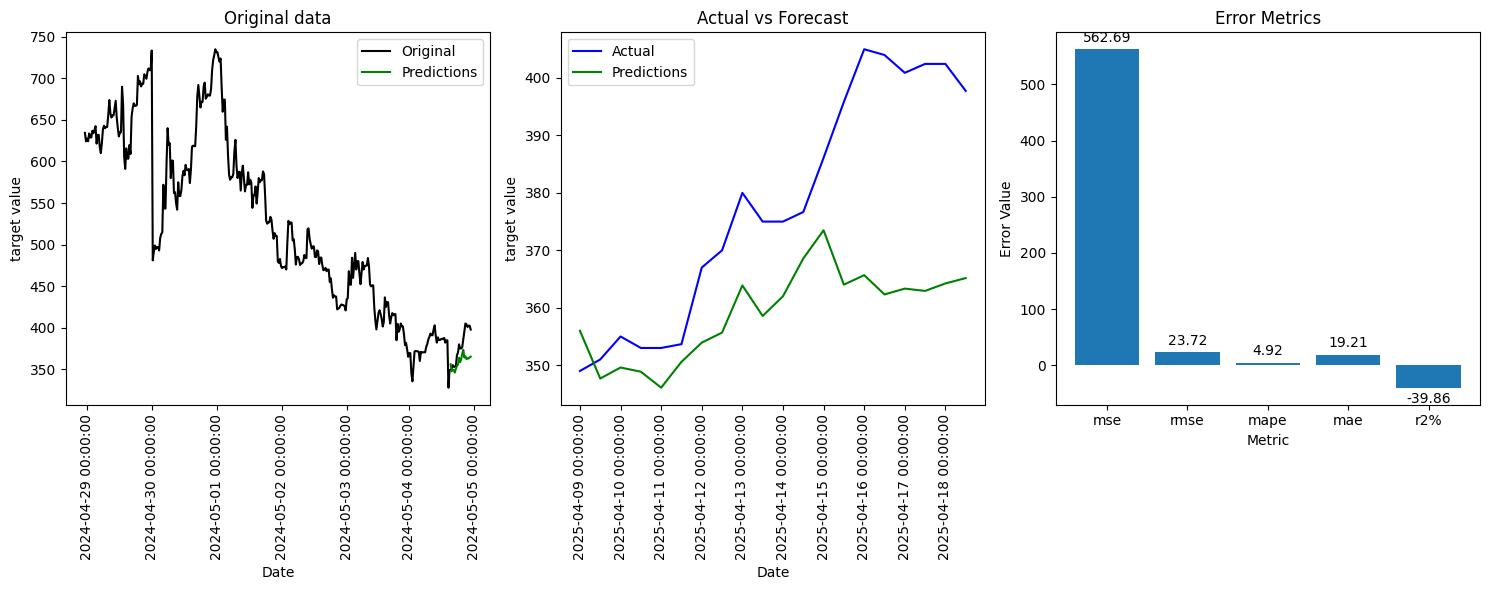

In [10]:

obj_1.data_plotting()

In [11]:
1/0

ZeroDivisionError: division by zero

In [12]:
obj_1.optimization( AutoReg,train_df,sub_train_df,val_df)
#  model_class,train_df,sub_train_df,val_df

[I 2025-05-26 18:27:56,611] A new study created in memory with name: no-name-e1f048e5-8289-4817-9fc7-31655dde0c02
[I 2025-05-26 18:27:56,622] Trial 0 finished with value: 271.8091062811719 and parameters: {'lags': 23}. Best is trial 0 with value: 271.8091062811719.
[I 2025-05-26 18:27:56,632] Trial 1 finished with value: 510.39833682849377 and parameters: {'lags': 12}. Best is trial 0 with value: 271.8091062811719.
[I 2025-05-26 18:27:56,673] Trial 2 finished with value: 232.81289223655276 and parameters: {'lags': 35}. Best is trial 2 with value: 232.81289223655276.
[I 2025-05-26 18:27:56,712] Trial 3 finished with value: 249.82466621346666 and parameters: {'lags': 38}. Best is trial 2 with value: 232.81289223655276.
[I 2025-05-26 18:27:56,724] Trial 4 finished with value: 366.9936354748446 and parameters: {'lags': 14}. Best is trial 2 with value: 232.81289223655276.
[I 2025-05-26 18:27:56,743] Trial 5 finished with value: 302.9051678924795 and parameters: {'lags': 45}. Best is trial 2

Best ARIMA order: {'lags': 35}
Best MSE: 232.81289223655276


In [13]:
obj_1.predict(train_df, test_df)

(            predictions      actual         mse     rmse      mape        mae  \
 2025-04-09   355.967562  349.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-10   346.320288  351.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-11   347.676550  355.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-12   346.230896  353.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-13   343.615539  353.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-14   347.870136  353.666667  832.616782  28.8551  6.198275  24.149883   
 2025-04-15   350.749214  367.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-16   351.730540  370.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-17   359.090322  380.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-18   353.213948  375.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-19   355.574203  375.000000  832.616782  28.8551  6.198275  24.149883   
 2025-04-20   36

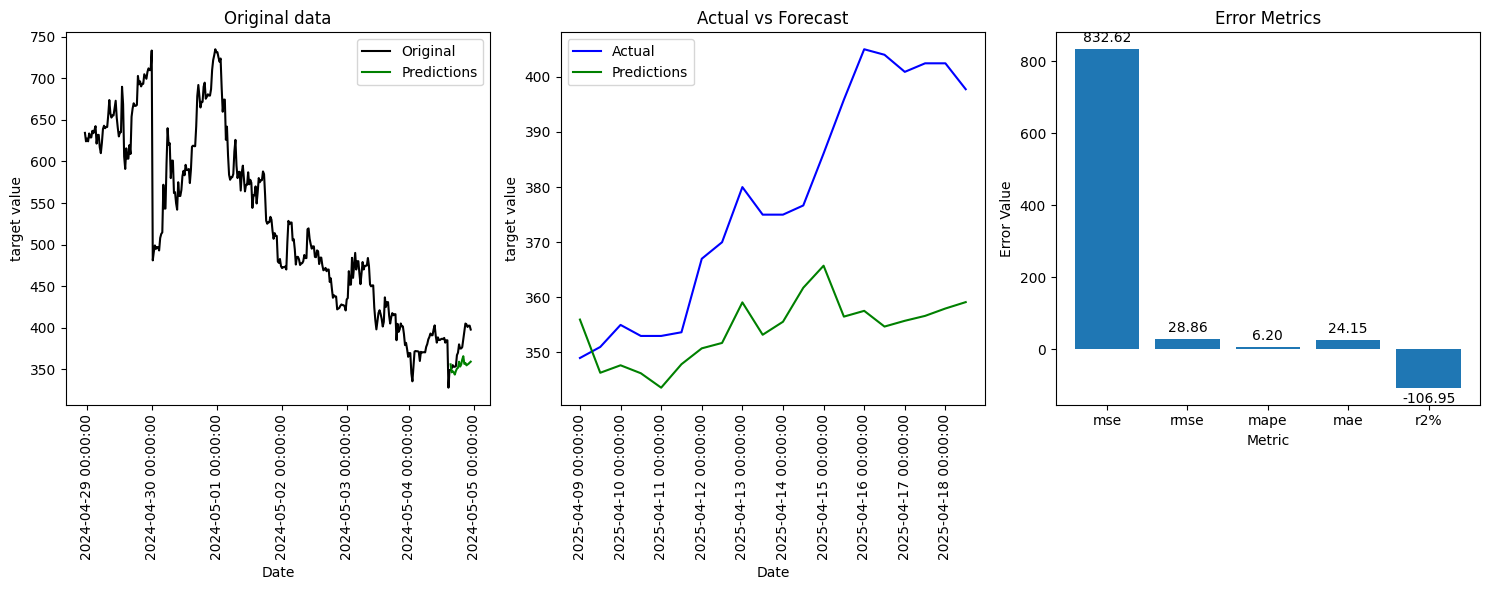

In [14]:

obj_1.data_plotting()

In [17]:
model_fitted = obj_1.optimization(ARIMA,train_df,sub_train_df,val_df) # AR model

[I 2025-05-26 18:08:26,668] A new study created in memory with name: no-name-879402ba-3706-4057-afd2-5579ea2ca4f8
[I 2025-05-26 18:08:29,088] Trial 0 finished with value: 241.43582154654896 and parameters: {'order': (15, 1, 6)}. Best is trial 0 with value: 241.43582154654896.
[I 2025-05-26 18:08:32,672] Trial 1 finished with value: 661.5312242873955 and parameters: {'order': (18, 2, 6)}. Best is trial 0 with value: 241.43582154654896.
[I 2025-05-26 18:08:34,217] Trial 2 finished with value: 799.9473936443597 and parameters: {'order': (8, 2, 8)}. Best is trial 0 with value: 241.43582154654896.
[I 2025-05-26 18:08:37,321] Trial 3 finished with value: 332.1413111786248 and parameters: {'order': (9, 1, 16)}. Best is trial 0 with value: 241.43582154654896.
[I 2025-05-26 18:08:39,543] Trial 4 finished with value: 526.4378776083911 and parameters: {'order': (10, 1, 13)}. Best is trial 0 with value: 241.43582154654896.
[I 2025-05-26 18:08:45,035] Trial 5 finished with value: 2966.5839602058127

Best ARIMA order: {'order': (15, 1, 6)}
Best MSE: 241.43582154654896


In [18]:
obj_1.predict(train_df, test_df)

(            predictions      actual         mse       rmse      mape      mae  \
 2025-04-09   356.212930  349.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-10   348.903362  351.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-11   350.691838  355.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-12   348.665204  353.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-13   344.151728  353.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-14   348.686788  353.666667  803.243994  28.341559  5.930195  23.1668   
 2025-04-15   351.150306  367.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-16   352.902152  370.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-17   359.397869  380.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-18   355.834312  375.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-19   359.600489  375.000000  803.243994  28.341559  5.930195  23.1668   
 2025-04-20   36

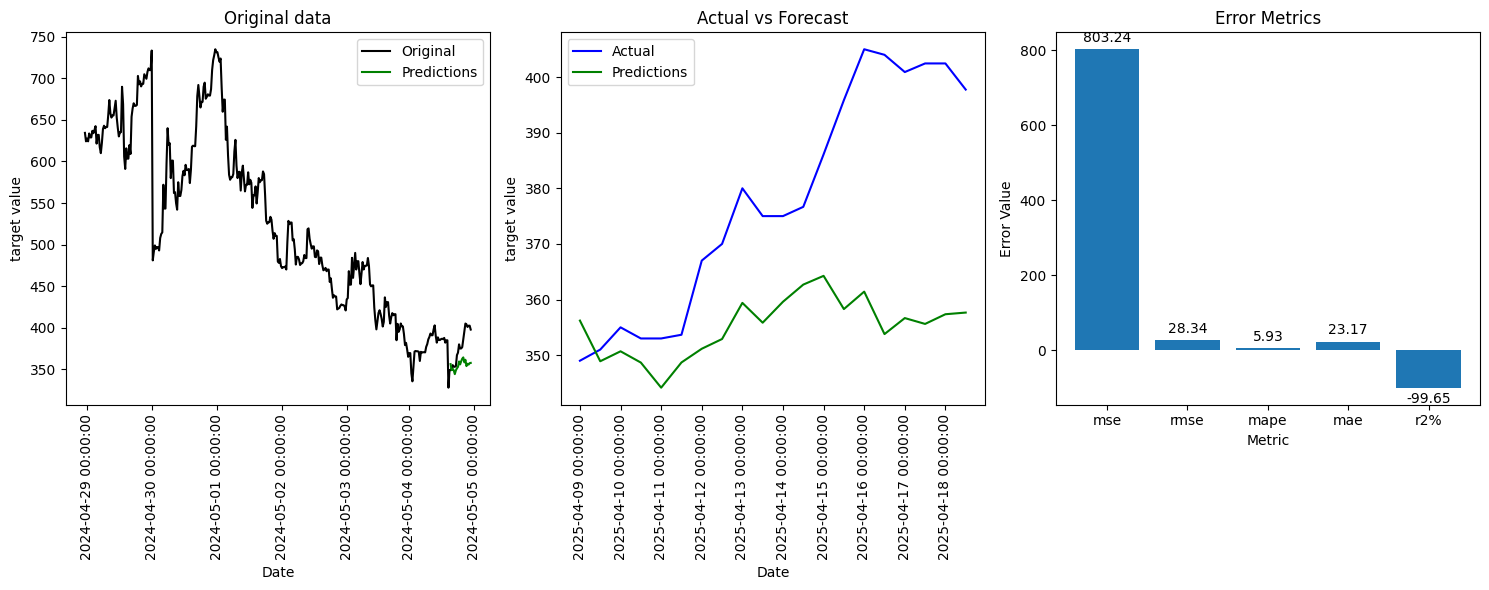

In [19]:
obj_1.data_plotting()

In [20]:
model_fitted = obj_1.optimization(ARIMA,train_df,sub_train_df,val_df) # AR model

[I 2025-05-26 18:11:40,913] A new study created in memory with name: no-name-fdbd7575-97f2-4059-8cfd-8e1274f7dec7
[I 2025-05-26 18:11:41,875] Trial 0 finished with value: 1044.7733576854607 and parameters: {'order': (7, 1, 5)}. Best is trial 0 with value: 1044.7733576854607.
[I 2025-05-26 18:11:45,814] Trial 1 finished with value: 2077.5410001420705 and parameters: {'order': (16, 3, 12)}. Best is trial 0 with value: 1044.7733576854607.
[I 2025-05-26 18:11:48,024] Trial 2 finished with value: 983.3360092716164 and parameters: {'order': (10, 2, 12)}. Best is trial 2 with value: 983.3360092716164.
[I 2025-05-26 18:11:51,980] Trial 3 finished with value: 339.37671793810813 and parameters: {'order': (11, 0, 19)}. Best is trial 3 with value: 339.37671793810813.
[I 2025-05-26 18:11:54,719] Trial 4 finished with value: 370.33826989777316 and parameters: {'order': (14, 1, 14)}. Best is trial 3 with value: 339.37671793810813.
[I 2025-05-26 18:11:57,170] Trial 5 finished with value: 248.116491937

Best ARIMA order: {'order': (14, 1, 6)}
Best MSE: 245.57150424375786


In [21]:
obj_1.predict(train_df, test_df)

(            predictions      actual         mse       rmse      mape  \
 2025-04-09   358.643670  349.000000  533.059932  23.088091  4.850965   
 2025-04-10   351.965720  351.000000  533.059932  23.088091  4.850965   
 2025-04-11   350.782734  355.000000  533.059932  23.088091  4.850965   
 2025-04-12   348.847686  353.000000  533.059932  23.088091  4.850965   
 2025-04-13   346.459420  353.000000  533.059932  23.088091  4.850965   
 2025-04-14   354.304265  353.666667  533.059932  23.088091  4.850965   
 2025-04-15   358.526847  367.000000  533.059932  23.088091  4.850965   
 2025-04-16   357.167675  370.000000  533.059932  23.088091  4.850965   
 2025-04-17   357.128649  380.000000  533.059932  23.088091  4.850965   
 2025-04-18   353.945958  375.000000  533.059932  23.088091  4.850965   
 2025-04-19   359.009395  375.000000  533.059932  23.088091  4.850965   
 2025-04-20   364.520717  376.666667  533.059932  23.088091  4.850965   
 2025-04-21   370.797800  386.100000  533.059932  2

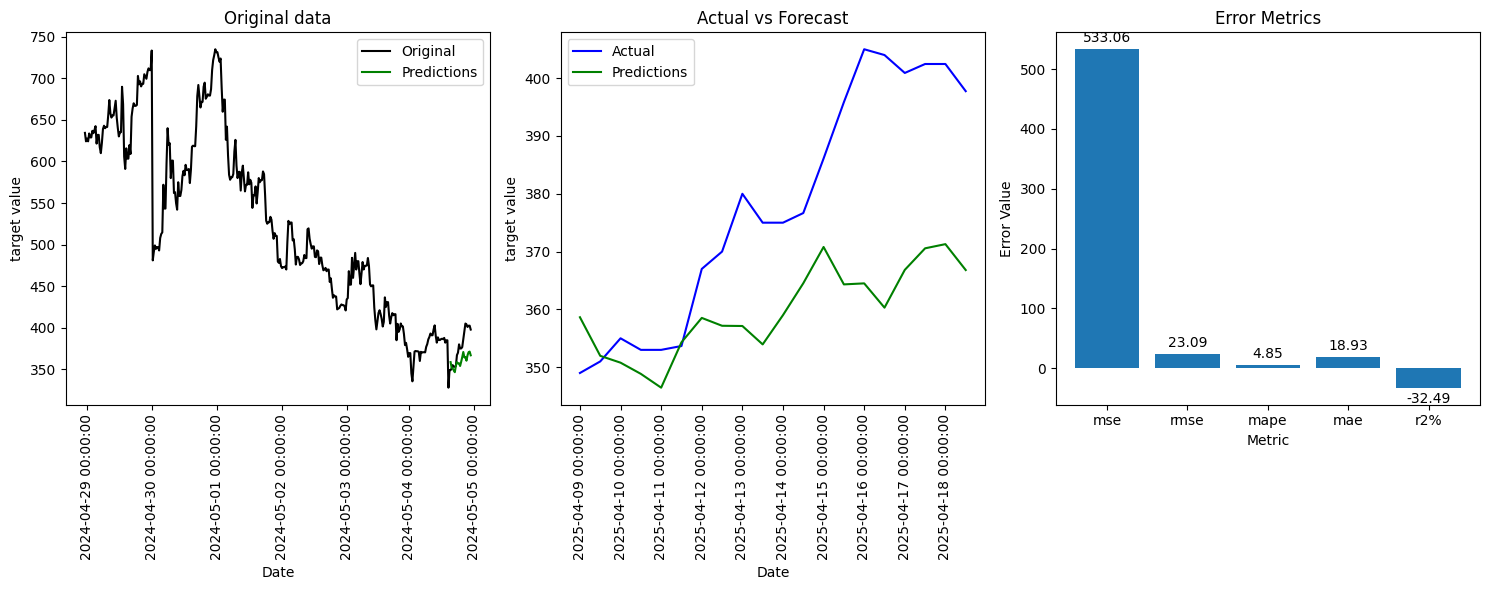

In [22]:
obj_1.data_plotting()

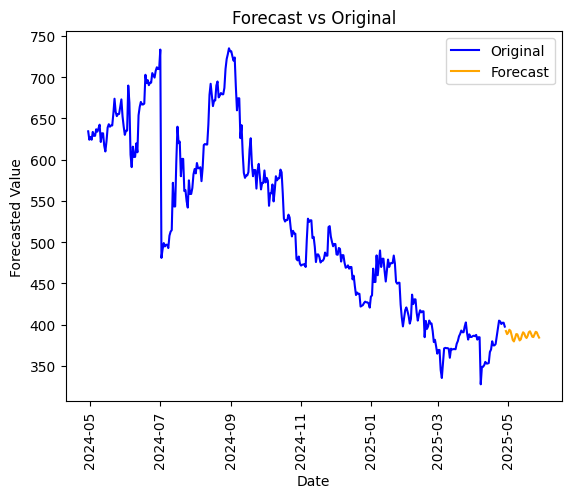

,Forecast
2025-04-29,392.370233
2025-04-30,388.629709
2025-05-01,390.356974
2025-05-02,393.969518
2025-05-03,392.613850
2025-05-04,387.276384
2025-05-05,381.411455
2025-05-06,379.786810
2025-05-07,383.867007
2025-05-08,388.699025


In [23]:
# ARIMA model
obj_1.forecast(ARIMA,data,steps = 30)

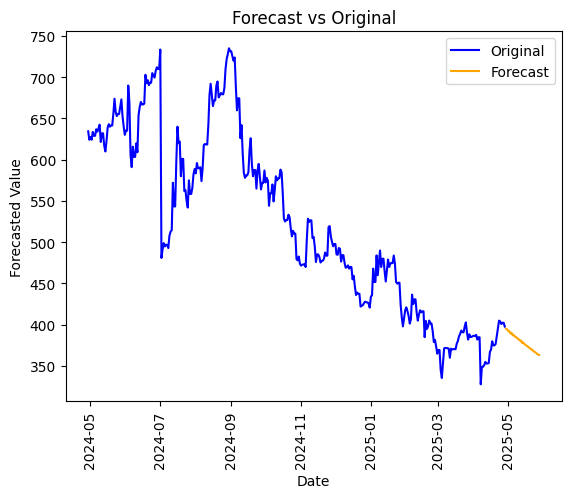

,Forecast
2025-04-29,395.222392
2025-04-30,394.675865
2025-05-01,392.343492
2025-05-02,392.372324
2025-05-03,389.240005
2025-05-04,390.191791
2025-05-05,387.182916
2025-05-06,387.503092
2025-05-07,385.387227
2025-05-08,385.192461


In [ ]:
# ARIMA model
obj_1.forecast(ARIMA,data,steps = 30)

### 3) ARMA MODEL 

In [23]:

obj_1.fit_model('ARMA',train_df,order=(10,0,15))

In [24]:
obj_1.predict(train_df, test_df)

(            predictions      actual         mse      rmse      mape       mae  \
 2025-04-09   353.644043  349.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-10   355.541213  351.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-11   352.030658  355.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-12   355.391447  353.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-13   350.436247  353.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-14   357.290886  353.666667  170.630203  13.06255  2.547372  9.969082   
 2025-04-15   362.055803  367.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-16   365.945852  370.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-17   371.351972  380.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-18   369.691729  375.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-19   369.119428  375.000000  170.630203  13.06255  2.547372  9.969082   
 2025-04-20   37

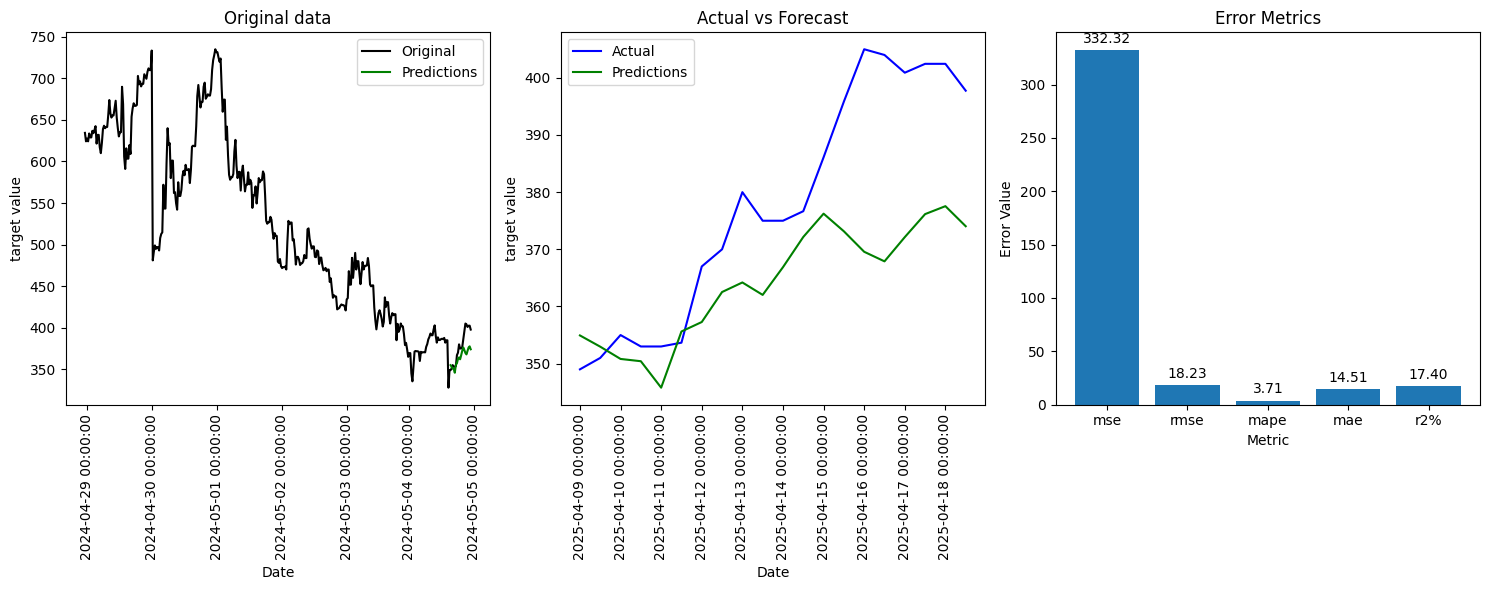

In [21]:
obj_1.data_plotting()

In [18]:
obj_1.optimization('ARMA',train_df,sub_train_df,val_df)

[I 2025-05-26 18:29:36,066] A new study created in memory with name: no-name-12745b3d-b669-4e40-9ea3-99ed39fe20a1
[I 2025-05-26 18:29:36,076] Trial 0 finished with value: 132.76832059110035 and parameters: {'order': (5, 0, 13)}. Best is trial 0 with value: 132.76832059110035.
[I 2025-05-26 18:29:36,086] Trial 1 finished with value: 132.76832059110035 and parameters: {'order': (5, 0, 6)}. Best is trial 0 with value: 132.76832059110035.
[I 2025-05-26 18:29:36,095] Trial 2 finished with value: 132.76832059110035 and parameters: {'order': (19, 0, 18)}. Best is trial 0 with value: 132.76832059110035.
[I 2025-05-26 18:29:36,105] Trial 3 finished with value: 132.76832059110035 and parameters: {'order': (12, 0, 3)}. Best is trial 0 with value: 132.76832059110035.
[I 2025-05-26 18:29:36,119] Trial 4 finished with value: 132.76832059110035 and parameters: {'order': (2, 0, 10)}. Best is trial 0 with value: 132.76832059110035.
[I 2025-05-26 18:29:36,132] Trial 5 finished with value: 132.7683205911

Best ARIMA order: {'order': (5, 0, 13)}
Best MSE: 132.76832059110035


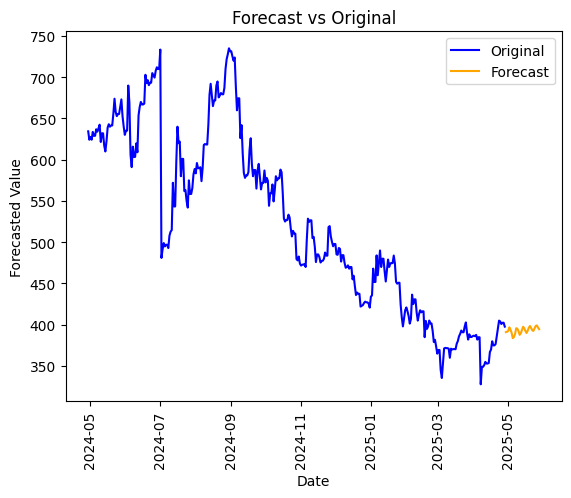

,Forecast
2025-04-29,391.040865
2025-04-30,391.661467
2025-05-01,392.451347
2025-05-02,396.878882
2025-05-03,394.171247
2025-05-04,390.123264
2025-05-05,383.759137
2025-05-06,385.077538
2025-05-07,388.897854
2025-05-08,395.838881


In [22]:
obj_1.forecast('ARMA',data,steps = 30)

### 4) ARIMA MODEL

In [ ]:

obj_1.fit_model(ARIMA,train_df,order=(10,1,15))

            predictions      actual         mse       rmse      mape  \
2025-04-09   354.345480  349.000000  557.494957  23.611331  4.895549   
2025-04-10   353.908664  351.000000  557.494957  23.611331  4.895549   
2025-04-11   349.338431  355.000000  557.494957  23.611331  4.895549   
2025-04-12   352.340803  353.000000  557.494957  23.611331  4.895549   
2025-04-13   345.938153  353.000000  557.494957  23.611331  4.895549   
2025-04-14   352.092719  353.666667  557.494957  23.611331  4.895549   
2025-04-15   356.248693  367.000000  557.494957  23.611331  4.895549   
2025-04-16   358.490799  370.000000  557.494957  23.611331  4.895549   
2025-04-17   361.862797  380.000000  557.494957  23.611331  4.895549   
2025-04-18   358.176498  375.000000  557.494957  23.611331  4.895549   
2025-04-19   356.201799  375.000000  557.494957  23.611331  4.895549   
2025-04-20   364.758674  376.666667  557.494957  23.611331  4.895549   
2025-04-21   369.094103  386.100000  557.494957  23.611331  4.89

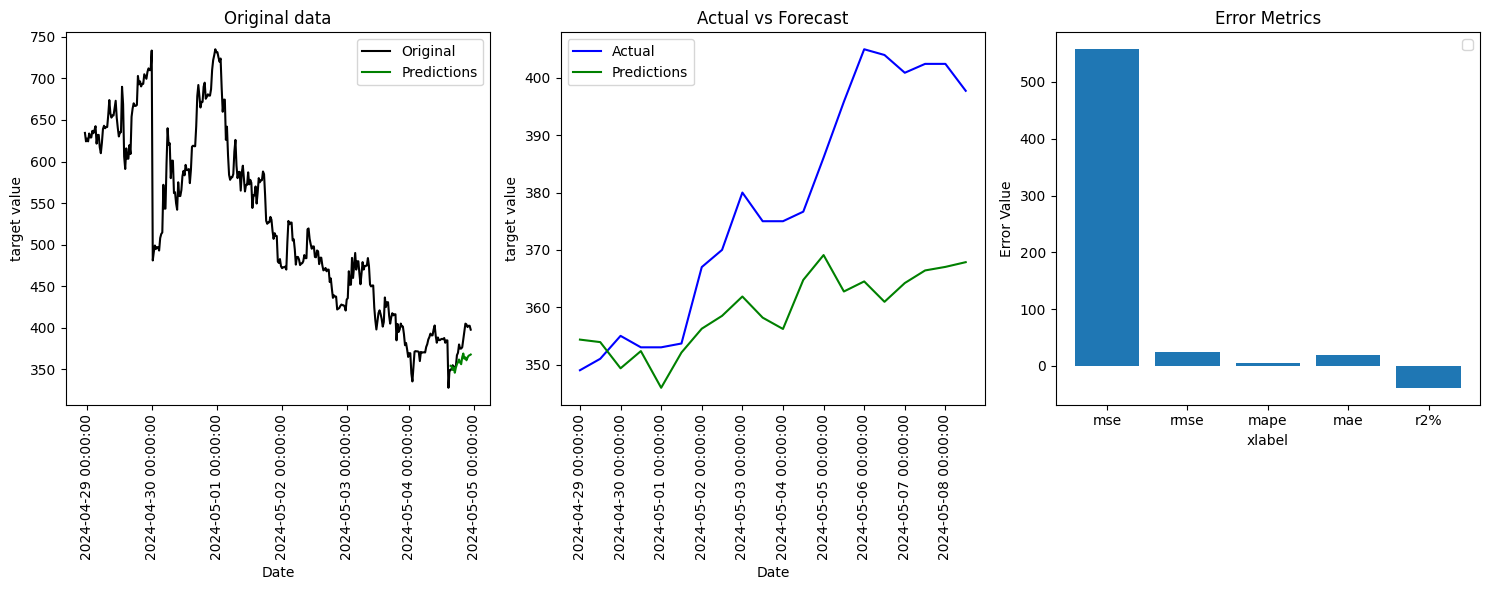

In [ ]:
obj_1.predict(train_df, test_df)
obj_1.data_plotting()

### 5) SARIMA MODEL

In [8]:
obj_1.fit_model(SARIMAX,train_df,order=(1,1,1),seasonal_order=(2,2,1,2))

In [9]:
obj_1.predict(train_df, test_df)

(            predictions      actual          mse       rmse       mape  \
 2025-04-09   339.595595  349.000000  4207.458009  64.864921  14.404542   
 2025-04-10   349.715369  351.000000  4207.458009  64.864921  14.404542   
 2025-04-11   332.173889  355.000000  4207.458009  64.864921  14.404542   
 2025-04-12   345.698013  353.000000  4207.458009  64.864921  14.404542   
 2025-04-13   319.420484  353.000000  4207.458009  64.864921  14.404542   
 2025-04-14   336.240360  353.666667  4207.458009  64.864921  14.404542   
 2025-04-15   319.905454  367.000000  4207.458009  64.864921  14.404542   
 2025-04-16   334.365547  370.000000  4207.458009  64.864921  14.404542   
 2025-04-17   314.794888  380.000000  4207.458009  64.864921  14.404542   
 2025-04-18   330.396486  375.000000  4207.458009  64.864921  14.404542   
 2025-04-19   309.870577  375.000000  4207.458009  64.864921  14.404542   
 2025-04-20   325.925972  376.666667  4207.458009  64.864921  14.404542   
 2025-04-21   307.253471 

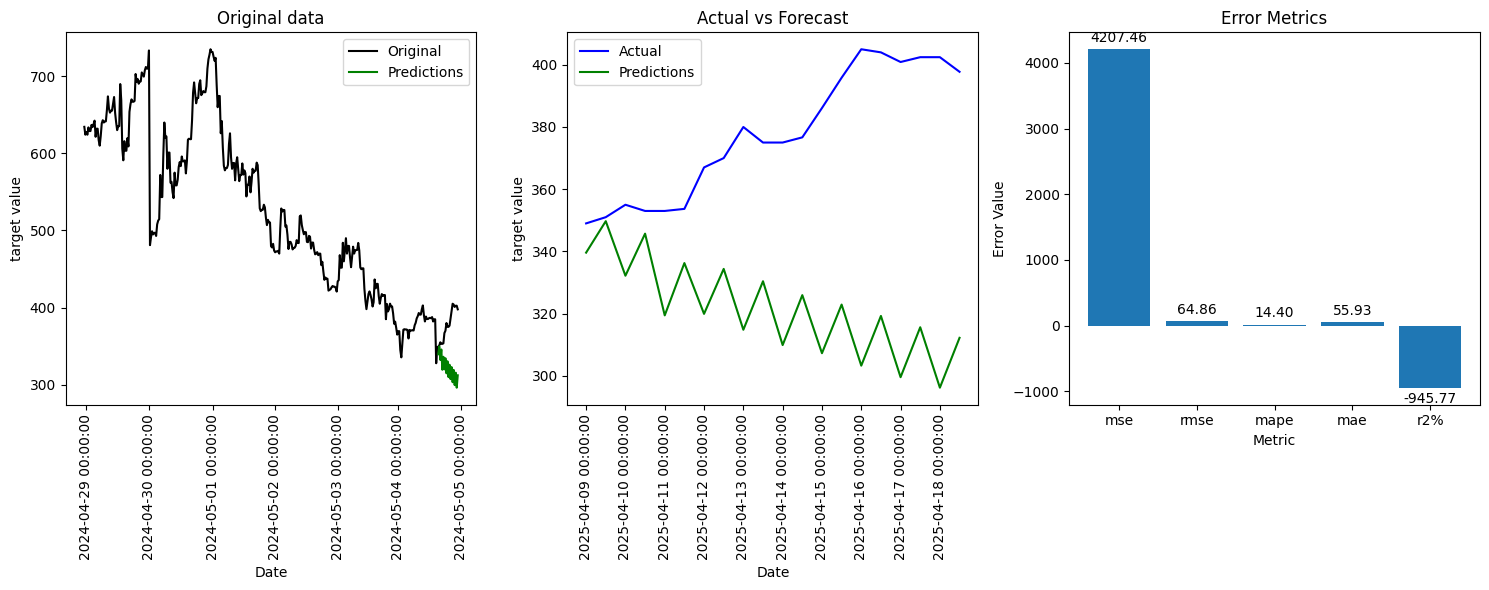

In [10]:
obj_1.data_plotting()

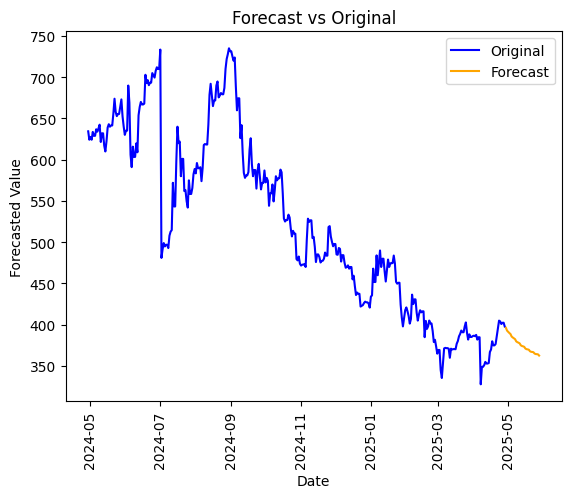

,Forecast
2025-04-29,396.267313
2025-04-30,392.875776
2025-05-01,391.382135
2025-05-02,389.983048
2025-05-03,388.705201
2025-05-04,385.730253
2025-05-05,384.547896
2025-05-06,383.559772
2025-05-07,382.505673
2025-05-08,379.873317


In [11]:
obj_1.forecast(SARIMAX,data,steps = 30,seasonal_order=(5,1,6,2))

In [12]:
obj_1.optimization(SARIMAX,train_df,sub_train_df,val_df)

[I 2025-06-02 18:14:11,513] A new study created in memory with name: no-name-09ca76cb-25e1-4a4a-b94b-23a5ad2f9d3e
[I 2025-06-02 18:14:50,024] Trial 0 finished with value: 242.76612141265088 and parameters: {'order': (1, 0, 1), 'seasonal_order': (11, 1, 8, 7)}. Best is trial 0 with value: 242.76612141265088.
[I 2025-06-02 18:15:47,863] Trial 1 finished with value: 417.582774119066 and parameters: {'order': (3, 0, 0), 'seasonal_order': (11, 1, 9, 8)}. Best is trial 0 with value: 242.76612141265088.
[I 2025-06-02 18:15:48,807] Trial 2 finished with value: 421.52063452014744 and parameters: {'order': (1, 0, 1), 'seasonal_order': (5, 1, 2, 2)}. Best is trial 0 with value: 242.76612141265088.
[I 2025-06-02 18:16:46,755] Trial 3 finished with value: 439.69730140128013 and parameters: {'order': (2, 0, 4), 'seasonal_order': (10, 0, 2, 11)}. Best is trial 0 with value: 242.76612141265088.


Best ARIMA order: {'order': (1, 0, 1), 'seasonal_order': (11, 1, 8, 7)}
Best MSE: 242.76612141265088


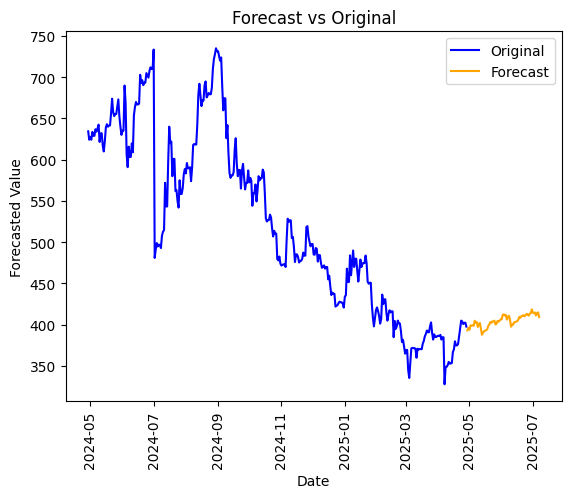

,Forecast
2025-04-29,393.199623
2025-04-30,396.270442
2025-05-01,394.030698
2025-05-02,399.068450
2025-05-03,399.123573
...,...
2025-07-03,414.879295
2025-07-04,411.324268
2025-07-05,414.021599
2025-07-06,415.042965


In [14]:
obj_1.forecast(SARIMAX,data,steps = 70,seasonal_order=(5,1,6,2))